In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
import cv2
import os

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


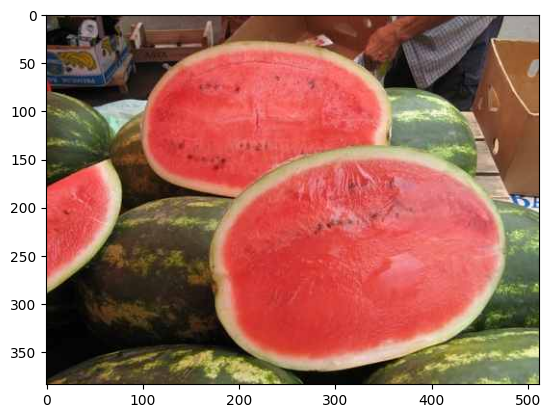

In [45]:
img = image.load_img("./data/archiveshort/validation/3lci8x.jpg")
plt.imshow(img)

In [23]:
cv2.imread("./data/archiveshort/validation/3lci8x.jpg").shape

(384, 512, 3)

In [3]:
path_treino = "./data/data/train/"
path_test = "./data/data/test/"

In [4]:
# Pré-processamento dos dados
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
        path_treino,
        target_size=(250, 250),
        batch_size=32,
        class_mode='categorical')

validation_dataset = test_datagen.flow_from_directory(
        path_test,
        target_size=(250, 250),
        batch_size=32,
        class_mode='categorical')

Found 9159 images belonging to 12 classes.
Found 2309 images belonging to 12 classes.


In [5]:
train_dataset.class_indices

{'banana': 0,
 'blackberry': 1,
 'bread': 2,
 'carrot': 3,
 'coconut': 4,
 'cucumber': 5,
 'lime': 6,
 'pineapple': 7,
 'pumpkin': 8,
 'strawberry': 9,
 'tomato': 10,
 'watermelon': 11}

In [6]:
import json

data = train_dataset.class_indices

with open('./model/dataset_indices.json', 'w') as f:
    json.dump(data, f)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Criar o modelo
model = Sequential()

# Adicionar as camadas convolucionais
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Adicionar camadas densas
model.add(Dense(512, activation='relu'))
model.add(Dense(len(train_dataset.class_indices), activation='softmax'))

# Compilar o modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
resultados = model.fit_generator(
        train_dataset,
        steps_per_epoch=20,
        epochs=40,
        validation_data=validation_dataset,
        )

# Fazer previsões
predictions = model.predict(validation_dataset)

In [ ]:
model.save("./model/modelo_fruits_classifier.h5")

In [ ]:
model = load_model("./model/modelo_fruits_classifier.h5")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Realizar a validação cruzada
# Criar o classificador Keras
classifier = KerasClassifier(build_fn=model, epochs=10, batch_size=32, verbose=0)

# Realizar a validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

X_train, y_train = next(train_dataset)
X_test, y_test = next(validation_dataset)

scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Imprimir os scores
# print("Scores:", scores)
# print("Accuracy:", scores.mean())

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


predictions = cross_val_predict(classifier, X_train, y_train, cv=4)
report = classification_report(y_train, predictions)

In [ ]:
print(report)
print("Accuracy:", scores.mean())

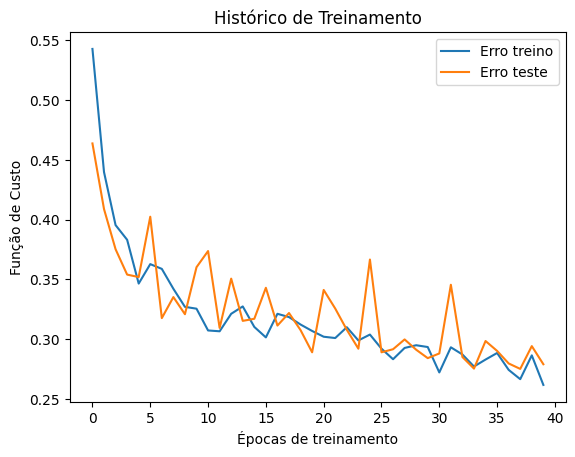

In [43]:
plt.plot(resultados.history["loss"])
plt.plot(resultados.history["val_loss"])
plt.title("Histórico de Treinamento")
plt.ylabel("Função de Custo")
plt.xlabel("Épocas de treinamento")
plt.legend(["Erro treino", "Erro teste"])
plt.show()

d:\AREA_DE_TRABALHO\Faculdade_6_Periodo\TIAW6\my-dishcover/data/archiveshort/validation_oficial/


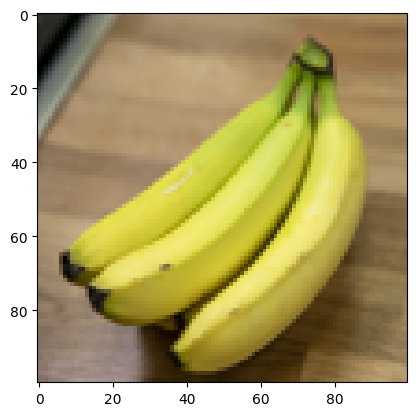

1/1 [==============================] - 0s 93ms/step
lemon


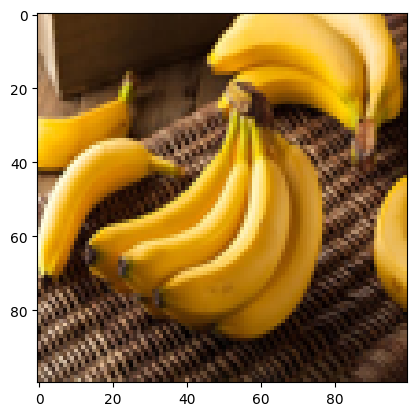

1/1 [==============================] - 0s 30ms/step
lemon


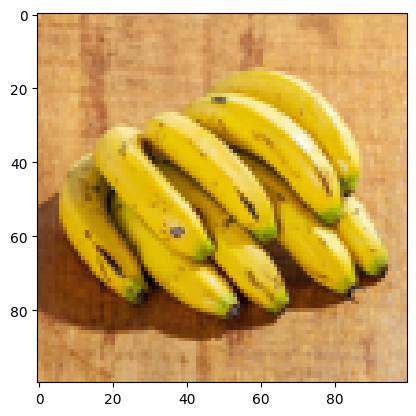

1/1 [==============================] - 0s 30ms/step
lemon


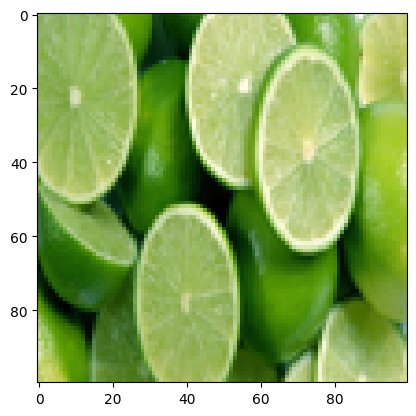

1/1 [==============================] - 0s 29ms/step
lime


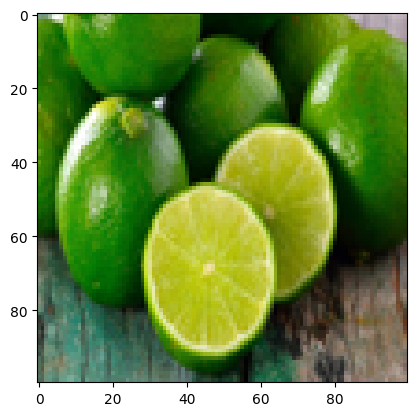

1/1 [==============================] - 0s 28ms/step
lemon


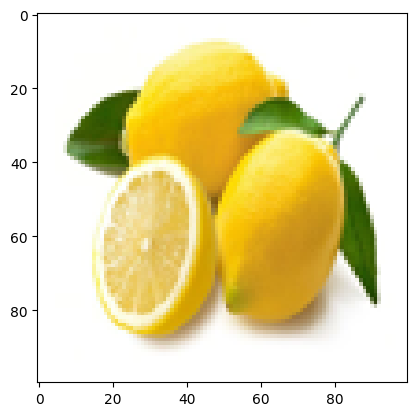

1/1 [==============================] - 0s 26ms/step
lemon


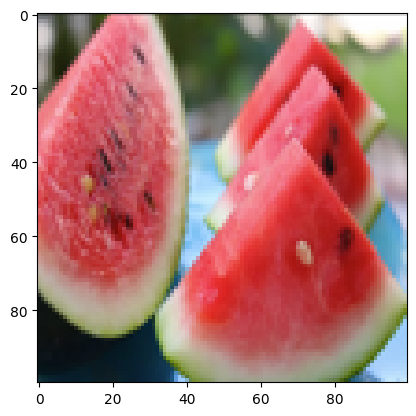

1/1 [==============================] - 0s 28ms/step
watermelon


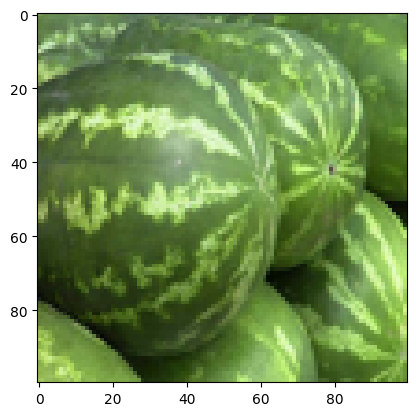

1/1 [==============================] - 0s 29ms/step
lime


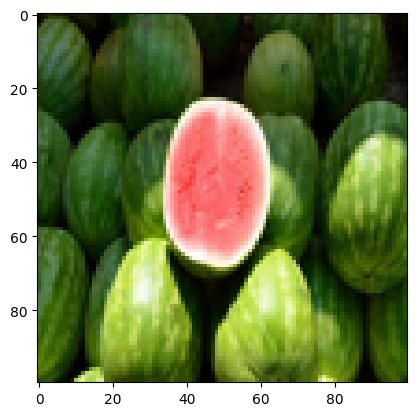

1/1 [==============================] - 0s 27ms/step
watermelon


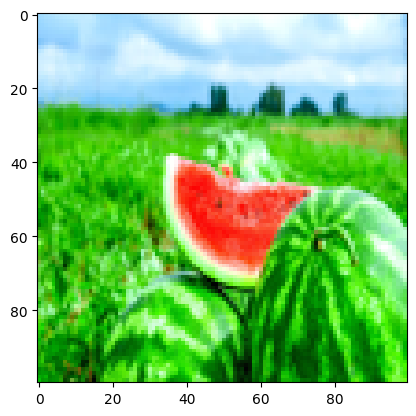

1/1 [==============================] - 0s 29ms/step
watermelon


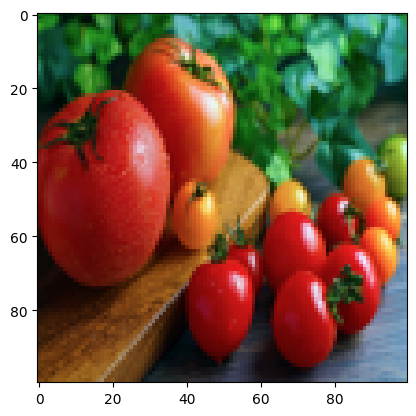

1/1 [==============================] - 0s 27ms/step
tomato


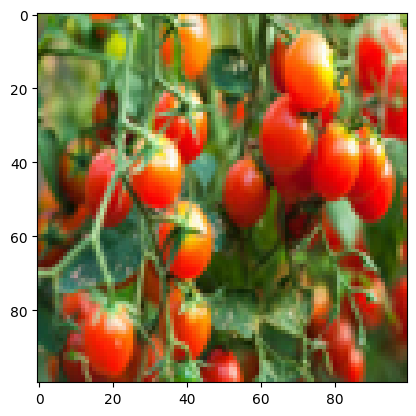

1/1 [==============================] - 0s 27ms/step
tomato


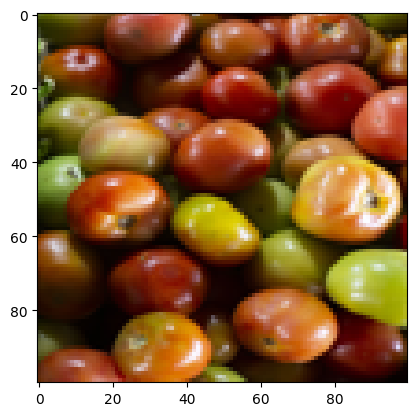

1/1 [==============================] - 0s 25ms/step
tomato


In [44]:
from PIL import Image

dire = os.getcwd()

diretorio = dire + "/data/archiveshort/validation_oficial/"
# diretorio = dire + "/data/archiveshort/data/validation/"

print(diretorio)

for filename in os.listdir(diretorio):
  

      if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):

        img_path = os.path.join(diretorio, filename)
      
        img = Image.open(img_path)
        # imagem_redimensionada = img.resize((100,100))
        # imagem_redimensionada.save(img_path)        
        
        # img = image.load_img(img_path)
        img = img.resize((100,100))
        plt.imshow(img)
        plt.show()
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        value = model.predict(images)
        value = value[0].tolist()
        
        value_list_int = list(map(int, value))         
        
        maxValue = max(value_list_int)        
        valu_posi = value_list_int.index(maxValue)
        
        
        dictClassifier = train_dataset.class_indices
        
        for i,each in enumerate(dictClassifier):
          
          if(valu_posi == i):
            print(each)